O objetivo é fazer um algoritmo de previsão de reputação com base nos dados fornecidos <br>
Deve ser usando random forest

In [3]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [4]:
pd.DataFrame({'Comprimentar': ['oi','oi','oi','tchau','tchau']})

,Comprimentar
0,oi
1,oi
2,oi
3,tchau
4,tchau


In [5]:
dataset = pd.read_csv('csv_result-ebay_confianca_completo.csv')
dataset.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [6]:
dataset['blacklist'] = dataset['blacklist'] == 'S'
dataset.head()
#o algoritmo n entende string, precisa converter para booleano ou numero

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,False,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,False,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,False,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,False,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,False,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [7]:
dataset.shape

(5806, 75)

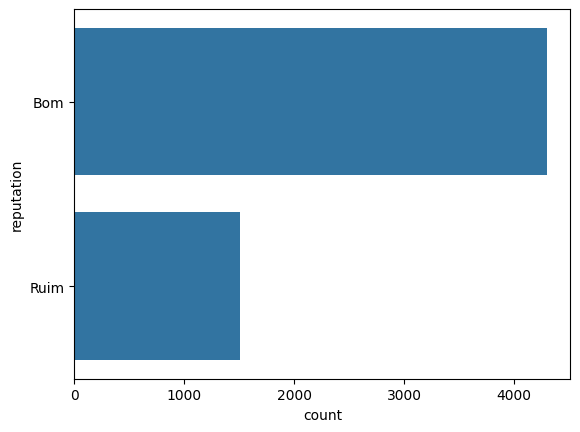

In [8]:
sns.countplot(dataset['reputation']);

In [9]:
X = dataset.iloc[:,0:74].values
print(X.shape)
print(X)

(5806, 74)
[[0 49 False ... 0.6400725899947721 0.598037041554872 0.828716381071851]
 [0 56 False ... 0.6444645861342442 0.603041772443901 0.8093789692710098]
 [0 50 False ... 0.6554697130298307 0.6450420335022421 0.82603890125472]
 ...
 [78 0 False ... 0.6974661634054785 0.6739035045452172 0.8320726536961992]
 [95 0 False ... 0.7706773179699052 0.7100477615788761 0.8199238314070743]
 [53 0 False ... 0.6239306346573744 0.6331205213003834 0.7920921058167003]]


In [10]:
y = dataset['reputation'].values
print(y.shape)
print(y)

(5806,)
['Bom' 'Bom' 'Bom' ... 'Bom' 'Ruim' 'Ruim']


In [11]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))

## Treinamento

In [12]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.2, stratify= y)

In [13]:
modelo = RandomForestClassifier(random_state= 3)
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier(random_state=3)

In [14]:
previsao = modelo.predict(X_teste)
accuracy_score(previsao,y_teste)


0.7478485370051635

## UnderSampling

In [15]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [16]:
print(np.unique(y, return_counts=True))
np.unique(y_under, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))


(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507], dtype=int64))

In [17]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under,y_under,test_size=0.2, stratify= y_under)

In [18]:
modelo_u = RandomForestClassifier(random_state=3)
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsao_u = modelo.predict(X_teste_u)
accuracy_score(previsao_u, y_teste_u)

0.9418819188191881

## OverSampling

In [19]:
smote = SMOTE(sampling_strategy='minority')
X_over,y_over = smote.fit_resample(X,y)

In [20]:
print(np.unique(y_over, return_counts= True))
print(np.unique(y, return_counts= True))

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299], dtype=int64))
(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))


In [21]:
X_treinamento_O,X_teste_O, y_treinamento_o, y_teste_o = train_test_split(X_over,y_over, test_size= 0.2, stratify=y_over)

In [22]:
modelo_o = RandomForestClassifier(random_state=3)
modelo_o.fit(X_treinamento_O, y_treinamento_o)
previsao_o = modelo.predict(X_teste_O)
accuracy_score(previsao_o, y_teste_o)

0.7226744186046512